# Jupyter Notebook for Problem Set 01
Troubleshooting: **Kernel -> Restart and Clear Output** resets the notebook state.

## Preliminaries: Using Jupyter notebooks
 - Jupyter notebooks consist of **cells**.
  - **Code cells** (light gray) contain executable code. When selected, they have a thin **green** border.
  - **Markdown cells** contain formatted text. When selected, they have a thin **blue** border.
- To run a code cell:
  - Click anywhere inside the cell.
  - Press **Shift + Enter** to execute all commands in that cell.
  - As a general rule, keep cells short and focused.
- Jupyter suppresses output by default.
  - To display results explicitly, use commands such as `print(...)`.

- To create a new cell:
  - Click the **“+”** button in the upper-left toolbar.
  - The new cell appears below the currently selected cell.
  - By default, new cells are code cells; you can change the type using the **“Code”** dropdown in the toolbar.

- To delete a cell:
  - Click inside the cell.
  - Click the **scissors** icon in the upper-left toolbar.

## Section 2.2: Fixed Points and Stability
Python can compute the roots of equations both **numerically** and **symbolically**.  
In this section, we will use the symbolic mathematics package **SymPy** to perform symbolic computations.

In [1]:
# Import symbolic and numerical computation libraries
import sympy as sym
import numpy as np

sym.init_printing()

To work symbolically in SymPy, variables must be explicitly declared.

There are multiple ways to define symbolic variables.

In [2]:
# Declare a single symbolic variable
x = sym.Symbol('x')

In [3]:
# Declare multiple symbolic variables at once
t, z0 = sym.symbols('t z_0')

Note that the Python variable name does not need to match the displayed symbolic name.  
For example, above we used `z0` to represent the symbolic variable \( z_0 \):

In [4]:
# Display the symbolic variable
z0

To define an equation in SymPy, use the `sym.Eq` function.

The first argument is the **left-hand side**, and the second argument is the **right-hand side**.  
For fixed-point calculations, we set the left-hand side equal to 0 and place the right-hand side of the ODE on the right.

We can then use `solve` to find the values of \( x \) that satisfy the equation.

In [ ]:
# Find fixed points using sym.solve.
equil_equation = sym.Eq(0, 4*x**2 - 16)
roots = sym.solve(equil_equation, x)

print(roots)

[-2, 2]


You can also use `solve` when the equation contains symbolic parameters.  
Just ensure that all parameters are defined symbolically before solving.


In [7]:
# Find fixed points in terms of a parameter
a = sym.symbols('a')

equil_equation = sym.Eq(0, a*x**2 - 16)
roots = sym.solve(equil_equation, x)

print(roots)

[-4*sqrt(1/a), 4*sqrt(1/a)]


Notice that issues arise when \( a = 0 \) (division by zero) or \( a < 0 \) (square roots of negative numbers).  
SymPy does not automatically warn about these cases.

Always inspect the output and note any parameter values for which the solution is not valid.


### Symbolic Graphing
If you have prior experience with Python, you may have used **Matplotlib** to plot functions.  Matplotlib is a powerful library that we will use later in the course, but **SymPy** also provides basic plotting functionality.

You are welcome to use Matplotlib; however, example code using SymPy’s symbolic plotting tools is provided below.

- The first argument to `plot` is the function to be plotted.
- Any variables appearing in the function must already be defined as **symbolic variables**.
- The second argument specifies the variable and the plotting interval.
  - If omitted, the default interval is \( (-10, 10) \).
- Optional arguments allow you to set properties such as color and title.

**Note:** Many standard functions (e.g., sine and cosine) are built into SymPy and do not need to be defined explicitly.  
We also use NumPy to access constants such as \( \pi \) (`np.pi`).

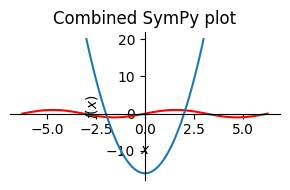

In [10]:
# Use sympy.plotting to create symbolic plots
from sympy.plotting import plot

# Plot two functions on the same axes
p1 = plot(4*x**2 - 16, (x, -3, 3), show=False, size=(3,2))
p2 = plot(sym.sin(x), (x, -2*np.pi, 2*np.pi),
          line_color='red',
          title='Combined SymPy plot',
          show=False,
          size=(3, 2))

p2.append(p1[0])
p2.show()

## Section 2.4: Linear Stability

You can differentiate any SymPy expression using `diff(function, variable)`.


In [11]:
# Differentiate a symbolic expression with respect to x
sym.diff(sym.sin(5 * x**3), x)

Python can also compute symbolic derivatives when expressions contain unknown parameters.

In [ ]:
# Compute the derivative with respect to x (treating a as a parameter)
dfdx = sym.diff(a*x**2 - 16, x)

To compute higher-order derivatives, include a third argument specifying the derivative order.

In [ ]:
# First derivative: equivalent to sym.diff(expr, x)
sym.diff(sym.sin(5 * x**3), x, 1)

In [ ]:
# Second derivative with respect to x
sym.diff(sym.sin(5 * x**3), x, 2)

Evaluate the derivative at a fixed point:

In [12]:
# Define parameter and equation
a = sym.symbols('a')
equil_equation = sym.Eq(0, a*x**2 - 16)

# Solve for fixed points
roots = sym.solve(equil_equation, x)
print(roots)

# Compute derivative of the vector field
dfdx = sym.diff(a*x**2 - 16, x)

# Evaluate derivative at each fixed point
for r in roots:
    print(dfdx.subs(x, r))

[-4*sqrt(1/a), 4*sqrt(1/a)]
-8*a*sqrt(1/a)
8*a*sqrt(1/a)


## Extra: Solving ODEs Symbolically
SymPy is capable of solving some ordinary differential equations symbolically.  This material is optional and provided for enrichment.

To solve differential equations, use `dsolve`.

First, create an undefined function by passing `cls=Function` to the `symbols` function:



In [14]:
# Define names of undefined symbolic functions
f, g = sym.symbols('f g', cls=sym.Function)

The symbols `f` and `g` are now undefined functions.  
For example, calling `f(x)` represents an unknown function of the variable \( x \).

In [16]:
# Display an undefined symbolic function of t
g(t)

The notation to compute the derivative of g is

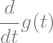

In [18]:
# Derivative of an undefined symbolic function with respect to t
g(t).diff(t)

As before, we can take higher derivatives as well

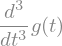

In [19]:
# Third derivative of an undefined symbolic function with respect to t
g(t).diff(t, 3)

Using `dsolve(equation, function)`, SymPy can solve certain ODEs symbolically.

Although we usually write ordinary differential equations in the form
$$g'(t)=\frac{d}{dt}g(t)=f(g(t)),$$
SymPy requires equations to be written with **zero on the right-hand side**:
$$g'(t)-f(g(t))=0$$


The expression passed as the first argument to `dsolve` is the **left-hand side** of this equation.

For example, the ODE
$$g'(t)=-g(t)$$
must be written as
$$g'(t)+g(t)=0$$

The corresponding SymPy code is shown below.

In [ ]:
# Solve the ODE g' = -g
sym.dsolve(g(t).diff(t) + g(t), g(t))

Sympy can handle some unknown parameters as well

In [21]:
# Solve an ODE with an unknown parameter
sym.dsolve(g(t).diff(t) + a*g(t), g(t))

## Section 2.8: Solving ODEs Numerically
If SymPy cannot solve an ODE symbolically—or if a symbolic solution is unnecessary—you can compute an approximate solution using SciPy’s numerical ODE solvers.

To do this, you must define a function that:
- takes the current state and time as inputs, and
- returns the value of the vector field.

Below is an example for the differential equation
$$\frac{dy}{ds}=e^{y^2}-cos(y)$$

**Note:** Since `x` and `t` have already been defined as symbolic variables, reusing those names would interfere with earlier calculations.  
For this reason, we use `y` and `s` for the numerical example.

In [25]:
# Right-hand side of the ODE dy/ds = exp(y^2) - cos(y)
def equation(s, y):
    dyds = np.exp(y**2) - np.cos(y)
    return dyds


Next, we specify an initial condition and the time interval over which to solve the ODE.

For the time interval, we provide:
- a starting value (here, 0),
- an ending value (here, 10), and
- the number of points at which to evaluate the solution (here, 200; the default is 50).

In [24]:
# Initial condition and time grid
y0 = -0.1
s = np.linspace(0,10,200)

Now we are ready to use SciPy’s `solve_ivp` function to solve the ODE on the specified time interval.

- The first argument is the function defining the right-hand side of the ODE.
- The second argument specifies the time interval.
- The third argument is the initial condition.

In [26]:
from scipy.integrate import solve_ivp

# Solve the ODE numerically
sol = solve_ivp(equation,
                [s.min(), s.max()],
                [y0],
                dense_output=True)

# Evaluate the solution on the time grid
y = sol.sol(s)[0]

We can now plot the numerical solution $y$.  
This solution is stored as a NumPy array, so we use Matplotlib (via `pyplot`) rather than SymPy’s symbolic plotting tools.

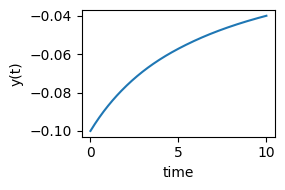

In [27]:
import matplotlib.pyplot as plt

# Plot the numerical solution
plt.figure(figsize=(3, 2))
plt.plot(s, y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.tight_layout()
plt.show()

Use initial conditions to create a temporal plot ($x(t)$ vs $t$) showing how solutions evolve from different starting values.

Each curve represents a solution trajectory starting from a different initial condition.

/var/folders/yz/zycl4gv10w1290l6knx0xh0w0000gq/T/ipykernel_57844/2375975363.py:21: RuntimeWarning: overflow encountered in exp
  return np.exp(y**2) - np.cos(y)
/var/folders/yz/zycl4gv10w1290l6knx0xh0w0000gq/T/ipykernel_57844/2375975363.py:21: RuntimeWarning: invalid value encountered in cos
  return np.exp(y**2) - np.cos(y)
/var/folders/yz/zycl4gv10w1290l6knx0xh0w0000gq/T/ipykernel_57844/2375975363.py:21: RuntimeWarning: overflow encountered in square
  return np.exp(y**2) - np.cos(y)


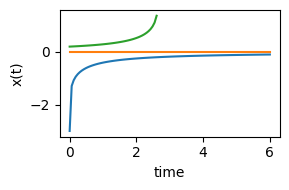

In [ ]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Stop integration if |y| reaches ymax by making an event function
def make_blowup_event(ymax):
    def blowup_event(t, y):
        return ymax - abs(y[0])
    blowup_event.terminal = True
    blowup_event.direction = -1
    return blowup_event

# Initial conditions
IClist = [-3, 0, 0.2]

# use y and s instead of x and t
# because x was used as a symbolic variable above.

# Right-hand side of the ODE dx/dt = exp(x^2) - cos(x),
#  expressed using y(s) instead of x(t)
def equation(s, y):
    return np.exp(y**2) - np.cos(y)

# Create an event function
eventfcn = make_blowup_event(ymax=5.0)

# Time grid
s = np.linspace(0,6,100)

# Create figure with smaller size than default
plt.figure(figsize=(3, 2))

# Plot solutions for multiple initial conditions
for y0 in IClist:
    sol = solve_ivp(equation,
                    [s.min(), s.max()],
                    [y0],
                    events=eventfcn,
                    t_eval=s)   # specify output times
    plt.plot(sol.t, sol.y[0])

plt.xlabel('time')
plt.ylabel('x(t)')
plt.tight_layout()
plt.show()
